In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf
import pickle

In [6]:
assets_list = ["BTC", 
"ETH",
"USDT",
"USDC",
"BNB",
"XRP",
"BUSD",
"ADA",
"SOL",
"DOGE",
"DOT",
"DAI",
"MATIC",
"WTRX",
"SHIB",
"HEX",
"TRX",
"AVAX",
"UNI1",
"WBTC",
"STETH",
"LEO",
"YOUC",
"LTC",
"LINK",
"ETC",
"ATOM",
"FTT",
"XLM",
"NEAR",
"CRO",
"XMR",
"ALGO",
"BCH",
"BTCB",
"LUNA1",
"FLOW",
"QNT",
"VET",
"APE3",
"TONCOIN",
"FIL",
"ICP",
"XCN1",
"CHZ",
"FRAX",
"HBAR",
"XTZ",
"MANA",
"SAND",
"WBNB",
"EOS",
"EGLD",
"THETA",
"AAVE",
"AXS",
"BIT1",
"OKB",
"USDP",
"BSV",
"KCS",
"TUSD",
"ZEC",
"MIOTA",
"BTT",
"XEC",
"HBTC",
"MKR",
"USDD",
"BTT2",
"HT",
"CAKE",
"HNT",
"GRT1",
"USDN",
"NEO",
"KLAY",
"FTM",
"SNX",
"PAXG",
"NEXO",
"RUNE",
"LDO",
"CRV",
"GT",
"DASH",
"ENJ",
"BAT",
"MV",
"COMP1",
"STX",
"KAVA",
"FEI",
"WAVES",
"ZIL",
"RVN",
"XAUT",
"MINA",
"LRC",
"XDC"
]

In [7]:
for i in assets_list:
    with open('pickles/'+str(i)+'-USD.pickle', 'rb') as handle:
          locals()[i] = pickle.load(handle)

In [8]:
df_tickers = pd.DataFrame()
for i in range(len(assets_list)):
    df_tickers = df_tickers.append(locals()[assets_list[i]]['Close']).reset_index(drop=True)
df_tickers['shortName']=assets_list
df_tickers = df_tickers.fillna(method='backfill')
df_tickers = df_tickers.fillna(method='ffill')
df_tickers.dropna(inplace=True)

In [9]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(df_tickers.T.iloc[:-1]).T

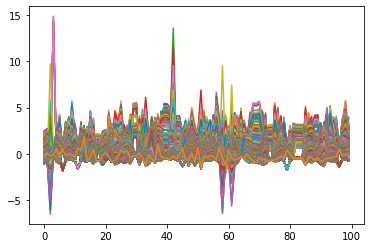

In [10]:
plt.plot(tickers_scaled);

In [11]:
with open('dtw_pickles/dtw_distortions.pickle', 'rb') as handle:
          distortions = pickle.load(handle)

In [12]:
with open('dtw_pickles/dtw_silhouette.pickle', 'rb') as handle:
          silhouette = pickle.load(handle)

In [24]:
globals()['k'] = 4

In [ ]:
# distortions = []
# silhouette = []
K = range(2, 10)
pbar = tqdm(total=10-globals()['k'])
with open('dtw_pickles/dtw_silhouette.pickle', 'rb') as handle:
          silhouette = pickle.load(handle)
with open('dtw_pickles/dtw_distortions.pickle', 'rb') as handle:
          distortions = pickle.load(handle)
# while globals()['k'] < 10:
#     kmeanModel = TimeSeriesKMeans(n_clusters=globals()['k'], metric="dtw", n_jobs=6, max_iter=10, n_init=5, verbose=False)
#     kmeanModel.fit(tickers_scaled)
#     distortions.append(kmeanModel.inertia_)
#     silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="dtw"))
#     with open('dtw_pickles/dtw_distortions.pickle', 'wb') as handle:
#       pickle.dump(distortions, handle, protocol=pickle.HIGHEST_PROTOCOL)
#     with open('dtw_pickles/dtw_silhouette.pickle', 'wb') as handle:
#       pickle.dump(silhouette, handle, protocol=pickle.HIGHEST_PROTOCOL)
#     globals()['k']=+1
#     pbar.update(1)

# for k in tqdm(K):
#     kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5, verbose=False)
#     kmeanModel.fit(tickers_scaled)
#     distortions.append(kmeanModel.inertia_)
#     silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="dtw"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

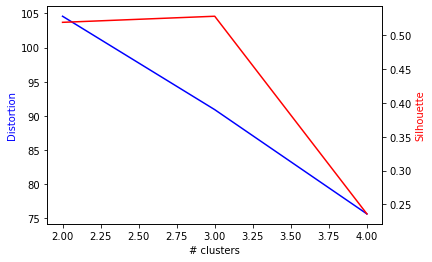

In [21]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2,5), distortions, 'b-')
ax2.plot(range(2,5), silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [117]:
with open('dtw_pickles/kmeanModel_dtw.pickle', 'wb') as handle:
    pickle.dump(kmeanModel, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [111]:
with open('dtw_pickles/dtw_silhouette.pickle', 'wb') as handle:
    pickle.dump(silhouette, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [112]:
with open('dtw_pickles/dtw_distortions.pickle', 'wb') as handle:
    pickle.dump(distortions, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dtw_pickles/ts_kmeans_dtw.pickle', 'wb') as handle:
    ts_kmeans_dtw = pickle.load(handle)

In [ ]:
# n_clusters = 4
# ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
# ts_kmeans_dtw.fit(tickers_scaled)

for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [23]:
with open('dtw_pickles/ts_kmeans_dtw.pickle', 'wb') as handle:
    pickle.dump(ts_kmeans_dtw, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
df_tickers['cluster'] = ts_kmeans_dtw.predict(tickers_scaled)
pd.DataFrame(df_tickers.groupby('cluster')['shortName'].value_counts())

shortName
cluster shortName           
0       AVAX               1
        CAKE               1
        EOS                1
        FEI                1
        SAND               1
...                      ...
2       XCN1               1
3       BUSD               1
        DAI                1
        PAXG               1
        XAUT               1

[100 rows x 1 columns]

In [26]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[0:-2])
        ax[index].set_title(f"{row.shortName}-USD")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                                   Cluster number: 0


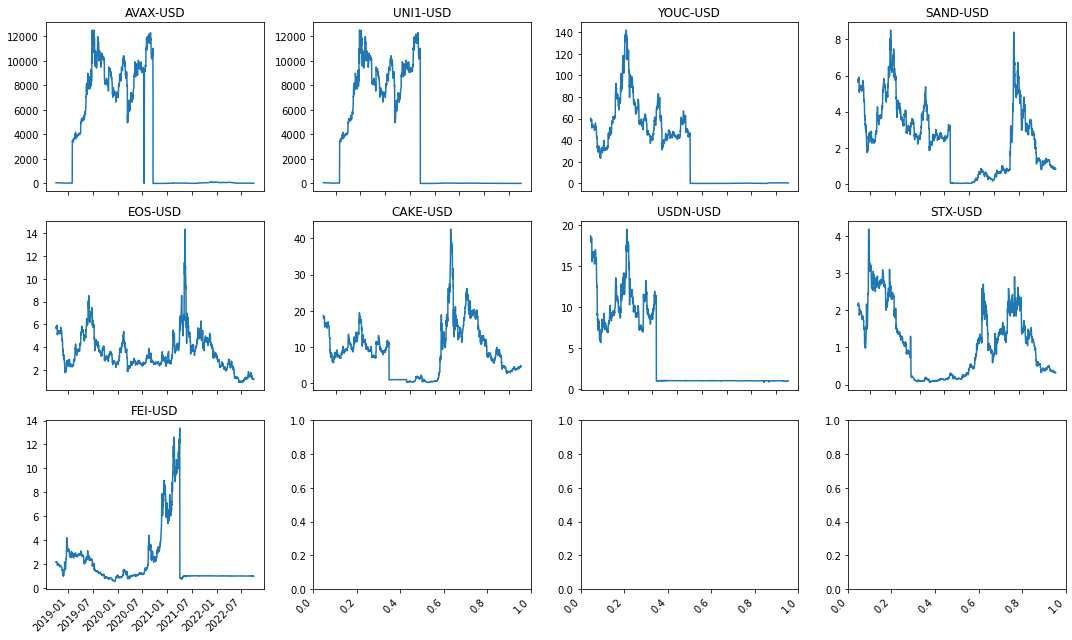

                                   Cluster number: 1


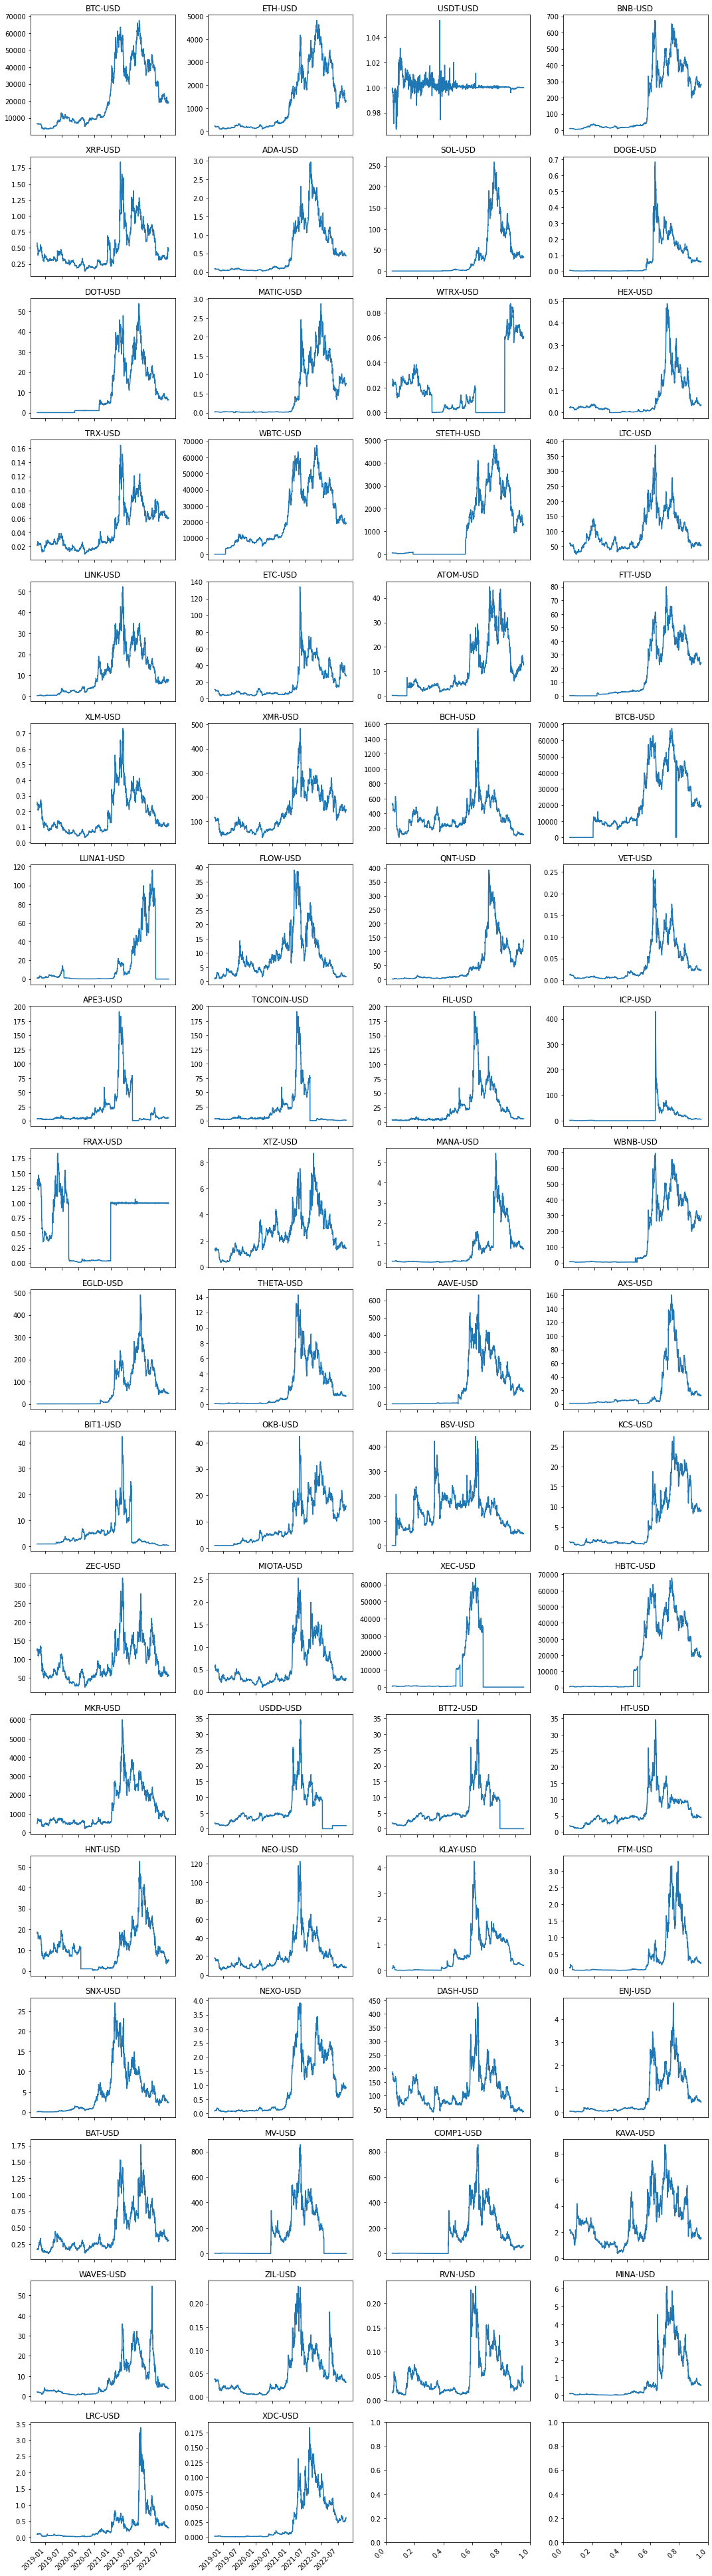

                                   Cluster number: 2


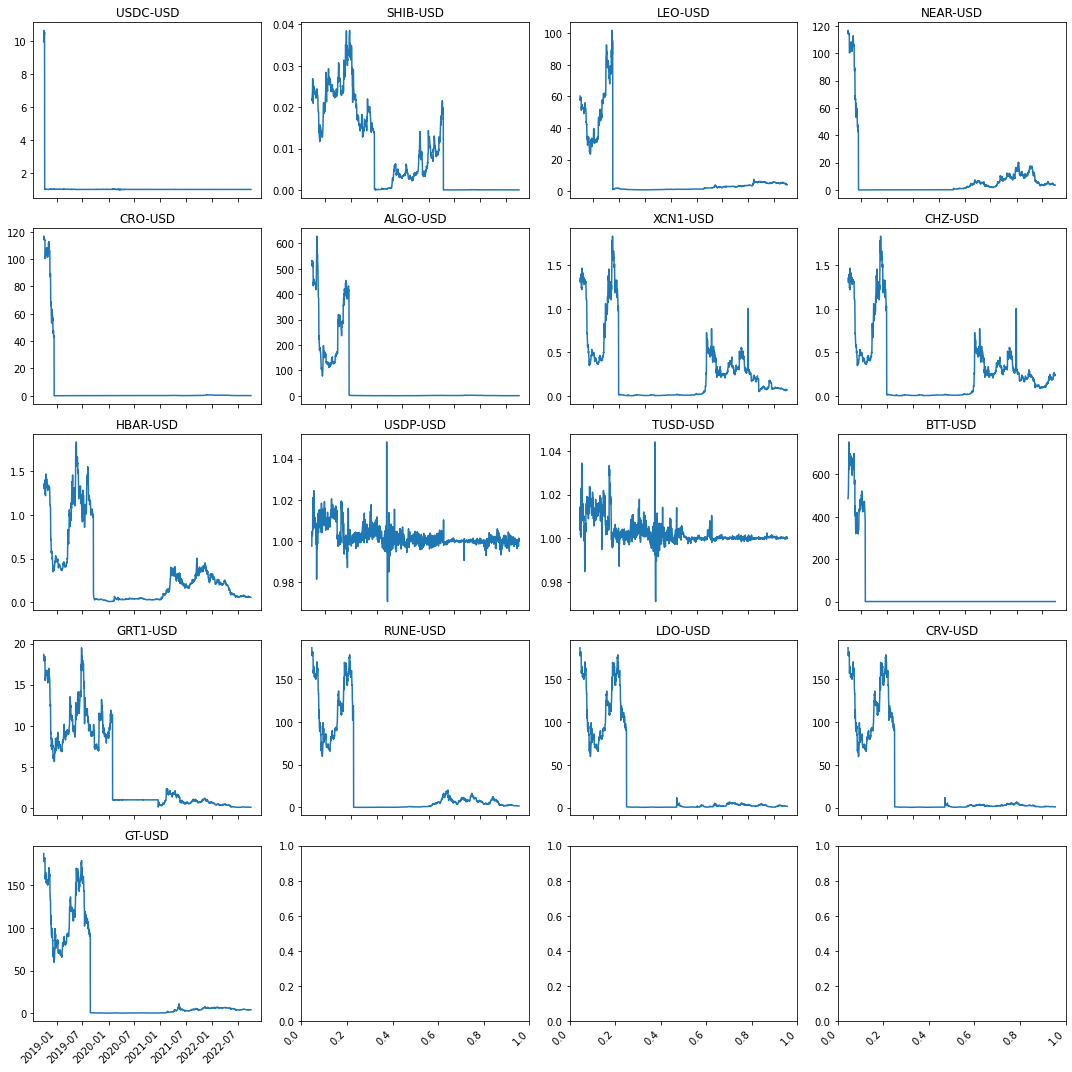

                                   Cluster number: 3


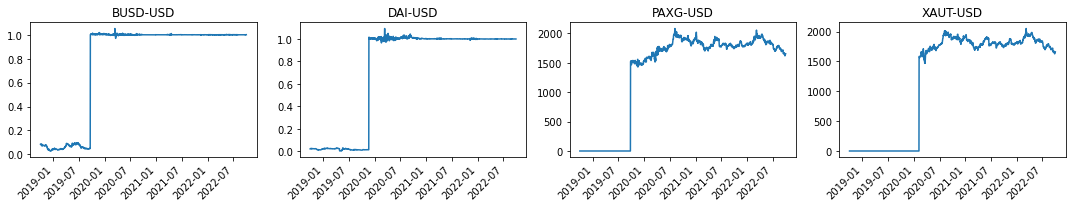

In [27]:
for cluster in range(n_clusters):
    print("===================================================================================================================================")
    print(f"                                   Cluster number: {cluster}")
    print("===================================================================================================================================")
    plot_cluster_tickers(df_tickers[df_tickers.cluster==cluster])